# ML K-Means Clustering - Unsupervised learning classifier

Based on Tech with Tim's YouTube Channel

https://www.youtube.com/watch?v=g1Zbuk1gAfk&t

https://techwithtim.net/tutorials/machine-learning-python/k-means-1/

https://techwithtim.net/tutorials/machine-learning-python/k-means-2/

* K in K-means clustering stands for how many clusters
* Centroids in clusters to segment clusters from others based on points that are closest in distance to centroid
* Begins by creating centroids in random positions on the graph dependent on value of K
* K= 3 then 3 centroids placed

<img src = https://miro.medium.com/max/1200/1*rw8IUza1dbffBhiA4i0GNQ.png>

# Centroids are an iterative process to get them closer to the clusters

<img src = https://www.researchgate.net/profile/Patricio_Benavente/publication/318042263/figure/fig1/AS:662908132397056@1535061023270/K-means-example-in-2D-space-a-Cluster-centroids-are-initialized-at-random-positions.png>

<img src = https://ds055uzetaobb.cloudfront.net/brioche/uploads/y4KGN92h7r-screen-shot-2016-05-05-at-43007-pm.png>

### Centroids central calculation by combining all the distances between the coordinate of the points and dividing by total number of points

\begin{align}
\frac{x_1 + x_2 + x_3 + \ldots}{n}
\end{align}

OR using positional coordinates

\begin{align}
\frac{P_1X_1 + P_2X_2 + P_3X_3 + \ldots}{n}
\end{align}

Repeat this process until no changes of points from their designated clusters

* Disadvantages include speed as K value increases
    * Essentially more centroids with distances between them to calculate
    * Number of data points + number of centroids + iterations to find optimal centroid position + features to determine

In [3]:
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans

In [4]:
# Loading dataset
digits = datasets.load_digits()
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
# Using SKLearn scale to rescale between -1 and 1 as this dataset is pixel values
# This is so to save computation time, especially in distance computation for working out centroids
# Also makes training easier and more accurate

data = scale(digits.data)
rescaled = pd.DataFrame(data)
rescaled

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


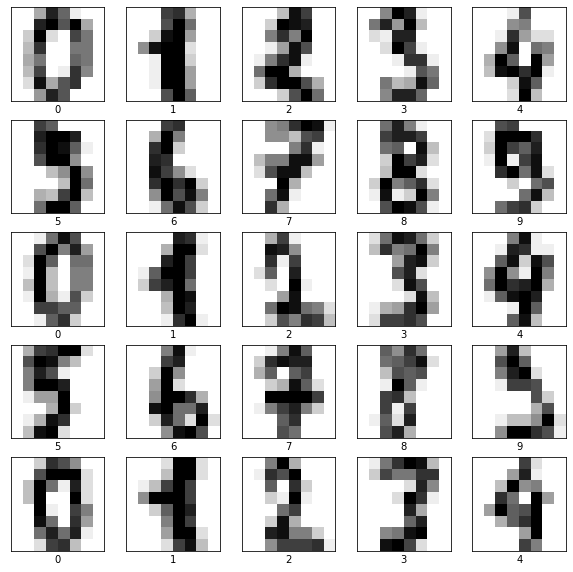

In [9]:
# Display what the images contain

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.xlabel(digits.target[i])
plt.show()

In [10]:
# separate the data from the target attributes

x = digits.data
y = digits.target



# define the amount of clusters by creating a variable k

# k = len(np.unique(y)) # Use the length of the unique numbers, fancy way :) if changing the amount of centroids

k = 10 # number of classifications, which is 10 digits on the hand here

In [11]:
len(np.unique(y))

10

In [12]:
samples, features = data.shape

# Scoring Function

* To score our model we are going to use a function from the sklearn website. 
* It computes many different scores for different parts of our model. 
* If you’d like to learn more about what these values mean please visit https://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

In [13]:
# Different functions for scoring the model and getting the best accuracy
# Allows training of a ton of different classifiers and score by calling this function
# This function gets the y values defined above (target) and compare them with the estimator labels for each of the data
# In unsupervised learning, no y values are required to train, as it automatically generates a y value for every single test data point given
# Therefore splitting data is not necessary

def bench_k_means(estimator, name, data):
    estimator.fit(data)
    print('%-9s\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, estimator.inertia_,
             metrics.homogeneity_score(y, estimator.labels_),
             metrics.completeness_score(y, estimator.labels_),
             metrics.v_measure_score(y, estimator.labels_),
             metrics.adjusted_rand_score(y, estimator.labels_),
             metrics.adjusted_mutual_info_score(y,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean'))) # absolute distance between two points/vector in space

# Training and scoring the model

In [14]:
# Classifier
# KMeans requires amount of centroids, amount of times to reiterate the classifier
# n_clusters = number of centroids
# init = how the centroids are intially placed, randomly or in equal distances to each other
# n_init = Number of time the k-means algorithm will be run with different centroid seeds, and takes the best value

model = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300)
bench_k_means(model, 'Scoring', data)

# The higher the values the better

Scoring  	69685	0.666	0.709	0.687	0.548	0.684	0.149


In [15]:
# Another way to train

model = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300)
model.fit(data)

KMeans(init='random', n_clusters=10)

# Evaluating the model

* Somehow unable to use model.fit(data)...
* Have to convert into labels_ then dataframe

In [16]:
predictedlab = model.labels_
predf = pd.DataFrame(predictedlab, columns=['Predicted'])
predf

,Predicted
0,2
1,0
2,0
3,9
4,6
...,...
1792,9
1793,2
1794,0
1795,9


In [17]:
type(digits.target)

numpy.ndarray

In [18]:
actualdf = pd.DataFrame(digits.target, columns=['Actual']) 
actualdf

,Actual
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


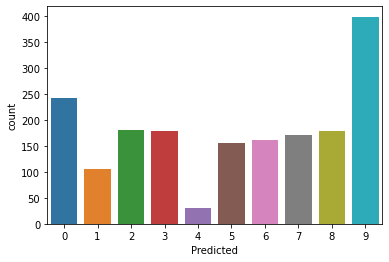

In [19]:
sns.countplot(data=predf, x='Predicted')

#pretty bad fit...

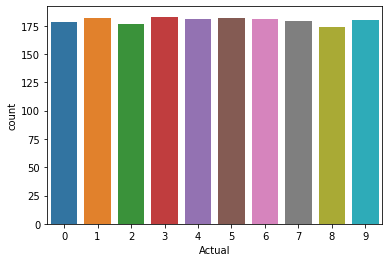

In [20]:
sns.countplot(data=actualdf, x='Actual')

# User validation

In [21]:
i = int(input('Pick a number between 0 and 1700'))

Pick a number between 0 and 1700 500


Prediction: 9 
Actual: 8


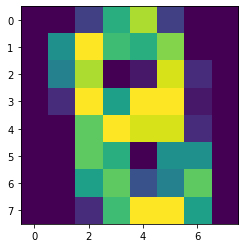

In [22]:
print('Prediction:',predictedlab[i],'\nActual:',digits.target[i])

plt.imshow(digits.images[i])

In [23]:
# Cross tabluation table
df = pd.DataFrame({'Predicted':predictedlab,'Actual':digits.target})
df

,Predicted,Actual
0,2,0
1,0,1
2,0,2
3,9,3
4,6,4
...,...,...
1792,9,9
1793,2,0
1794,0,8
1795,9,9


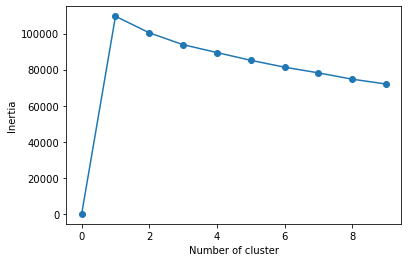

In [24]:
# inertia
inertia_list = np.empty(10)
for i in range(1,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0,10),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.ylabel('Inertia')
plt.show()

# User Validation 2

In [25]:
import random

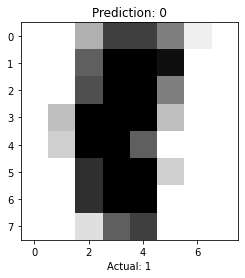

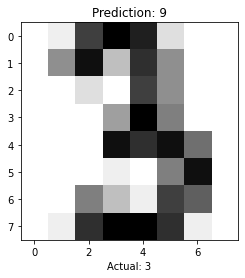

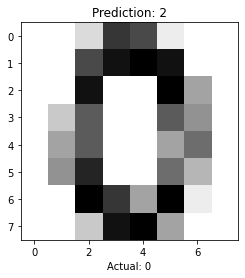

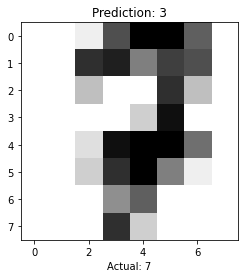

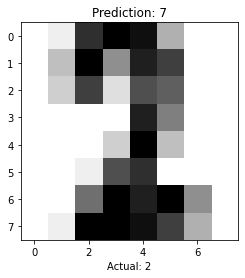

In [26]:
for _ in range(5):
    i = random.randint(1, 1700)
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual: " + str(digits.target[i]))
    plt.title("Prediction: " + str(predictedlab[i]))
    plt.show()

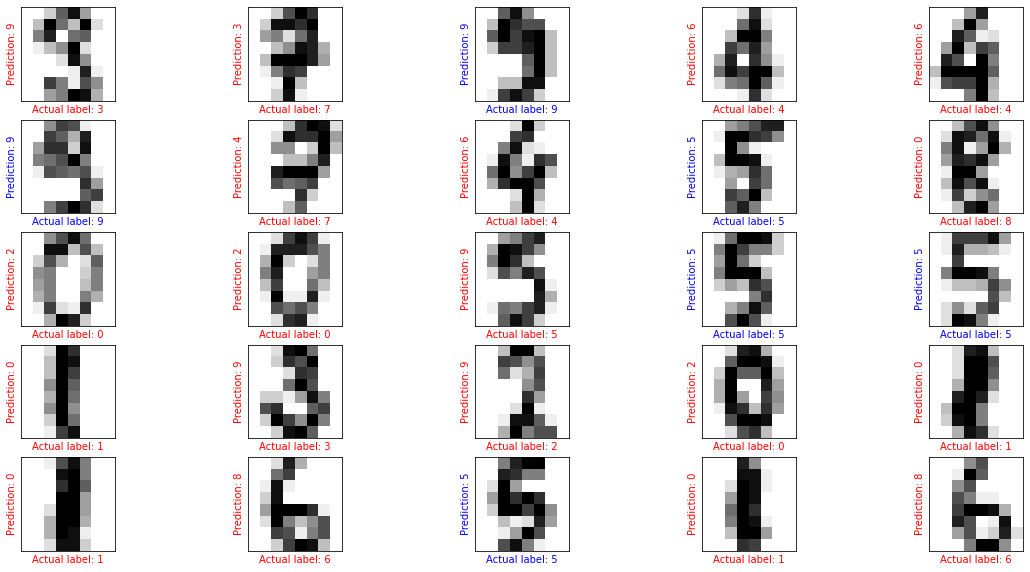

In [27]:
import random

num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for _ in range(num_images):
    i = random.randint(1, 1700)
    plt.subplot(num_rows, 2*num_cols, 2*_+1)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    if predictedlab[i] == digits.target[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('Actual label: ' + str(digits.target[i]), color=color)
    plt.ylabel("Prediction: " + str(predictedlab[i]), color=color)


In [37]:
x[predictedlab == 1, 2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 2., 0., 0., 0.,
       0., 0., 0.])

In [39]:
model.cluster_centers_

array([[ 0.00000000e+00, -2.29788223e-01, -2.19408716e-01,
         1.29495929e-01,  1.36124266e-01, -1.38019526e-01,
        -2.93660895e-01, -1.25022923e-01,  2.90239949e-02,
        -3.05852362e-01, -2.39728599e-01,  4.57009866e-01,
         5.30827715e-01,  2.40421500e-01, -1.09928320e-01,
        -1.30433381e-01,  8.84724482e-02, -3.16806021e-01,
        -2.17100081e-01,  7.18673722e-01,  8.31619027e-01,
         2.16102544e-01, -2.57237992e-01, -1.14221844e-01,
         2.15513918e-01, -4.68525693e-01, -3.13027098e-01,
         7.86690751e-01,  6.66941615e-01, -4.83362246e-01,
        -5.92867501e-01, -4.72323823e-02,  0.00000000e+00,
        -4.79178495e-01, -3.13689327e-02,  8.95672145e-01,
         4.00337018e-01, -1.10596190e+00, -8.21521147e-01,
         0.00000000e+00, -6.13436689e-02, -1.95824673e-01,
         4.66329311e-01,  7.66146833e-01,  6.03394110e-01,
        -7.09058053e-01, -7.39813384e-01, -8.87416172e-02,
        -3.54332626e-02,  6.70627644e-02,  3.57237679e-0

# MatplotLib Visualisation Example from SkLearn Documentation

Code extracted from: 

https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	5.06s	69510	0.610	0.657	0.633	0.481	0.629	0.129
random   	5.91s	69907	0.633	0.674	0.653	0.518	0.649	0.131
__________________________________________________________________________________


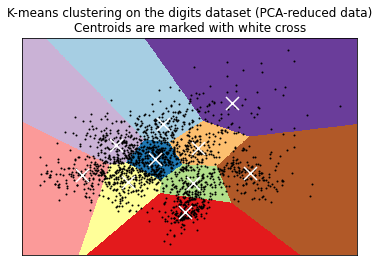

In [44]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42) # makes the random numbers predictable, like random_state in train splitting

digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target

sample_size = 300

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))


print(82 * '_')
print('init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette')


def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('%-9s\t%.2fs\t%i\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f\t%.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.adjusted_mutual_info_score(labels,  estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)


print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()